## Première partie : Handling Missing Values

In [ ]:
from IAS.Machine_Learning import Learn
from IAS.Machine_learning import notebooks

## 1. What is missing values

Missing values are that was

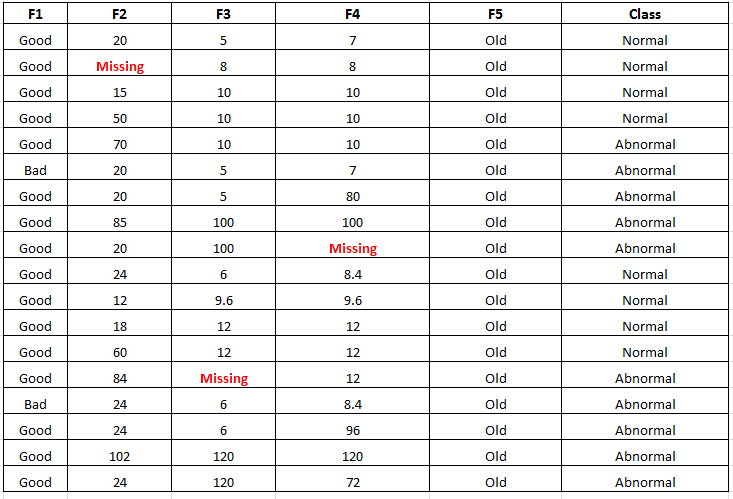

## 2 Initialisation

In [ ]:
import numpy as np
import pandas as pd

## 3. Create a dataframe

* np.random.randint(min, max,length) : retourne un tableau de de longueur *length*, contenant des entiers compris entre *min*(inclus) et *max*(exclus)

* np.random.random(length): retourne un tableau de longueur *length*, contenant des rééls compris entre 0 et 1.

* 

In [ ]:
df = pd.DataFrame({"Date":pd.date_range(start = "2022-01-01",periods = 10, freq = "D"),
"Item": 11,
"Mesure_1": np.random.randint(1,10,size = 10),
"Mesure_2": np.random.random(10).round(2),
"Mesure_3": np.random.random(10).round(2)})

In [ ]:
df

,Date,Item,Mesure_1,Mesure_2,Mesure_3
0,2022-01-01,11,1,0.76,0.36
1,2022-01-02,11,2,0.03,0.34
2,2022-01-03,11,6,0.02,0.23
3,2022-01-04,11,2,0.12,0.32
4,2022-01-05,11,7,0.13,0.52
5,2022-01-06,11,5,0.51,0.12
6,2022-01-07,11,9,0.56,0.33
7,2022-01-08,11,8,0.56,0.39
8,2022-01-09,11,5,0.80,0.92
9,2022-01-10,11,5,0.37,0.94


## 4. Add missing values to the dataframe

The next step is to add the missing values. We will use the loc method to select the row and column combinations and make them equal to “np.nan” which is one of the standard missing value representations.

In [ ]:
df.iloc[[2,9], "Item"] = np.nan
df.iloc[[2,7,9], "Mesure_1"] = np.nan
df.iloc[[2,3], "Mesure_2"] = np.nan
df.iloc[[2], "Mesure_3"] = np.nan
df.iloc[:6, "Mesure_4"] = np.nan

## 5. Treat missing values

dataframe.dropna()

* With the default parameter values, the dropna function drops the rows that contain at least one missing value

* With parameter with axis=1, we delete columns having at least one missing value

* Drop rows or columns that only have missing values ; give to the function the parameter how = "all"

* Drop rows or columns based on a threshold value : if threshold=n, it will delete rows that have at least n missing values

* Drop based on a particular subset of columns

* We can take only some of the columns into consideration when dropping columns.

* 5. Fill with a constant value : We can choose a constant value to be used as a replacement for the missing values.

*  Fill with an aggregated value : Another option is to use an aggregated value such as mean, median, or mode.

In [ ]:
## Supprimer toutes les lignes ayant au moins une valeur manquante
df.dropna()

In [ ]:
df.dropna(axis = 1)

In [ ]:
dfdropna(how="all")

In [ ]:
df.dropna(threshold = 5)

In [ ]:
df.dropna(subset = ['c1','c2'])

In [ ]:
values = {"Item" :1014, "Mesure_1":0}
df.fillna(value = values)

In [ ]:
df['Mesure_2'].fillna(df['Mesura_2'].mean())

## Deuxième partie

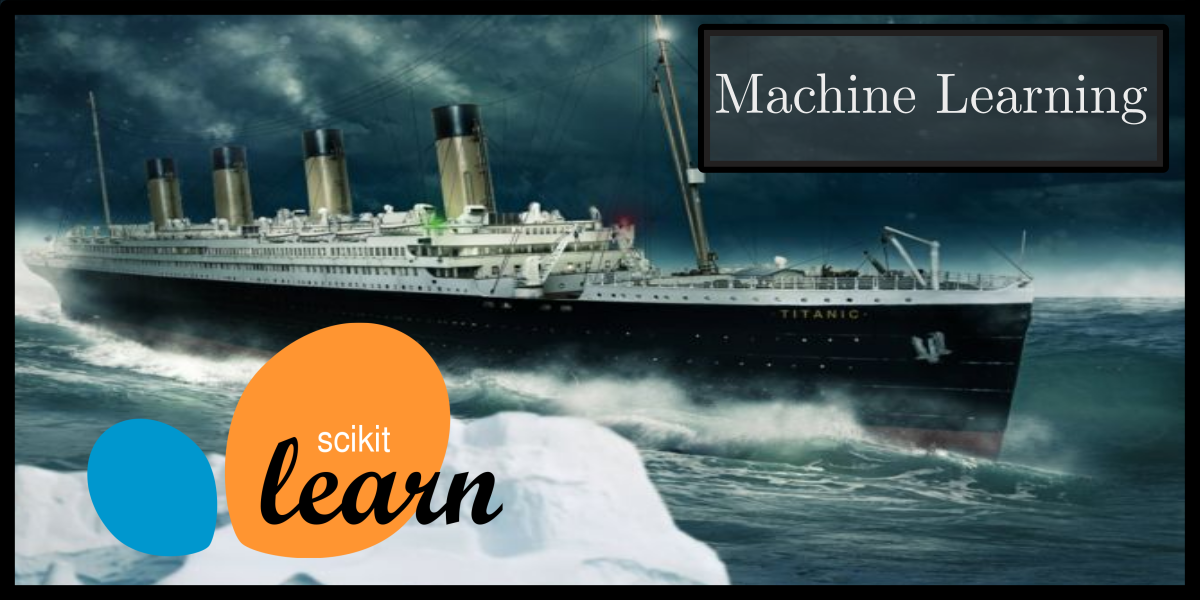

## 1. Initialization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2.Read dataset

In [ ]:
df = pd.read_csv("titanic.csv")

In [ ]:
df.head()
df.shape
df.describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Delete specific columns from dataframe

In [ ]:
column_index(df, ['Survived','Pclass'])
#df.drop(["PassengerId",'Ticket'],axis = 1,inplace = True)

array([1, 2])

## 4. Visualization

[Text(0.5, 1.0, 'Points by Team')]

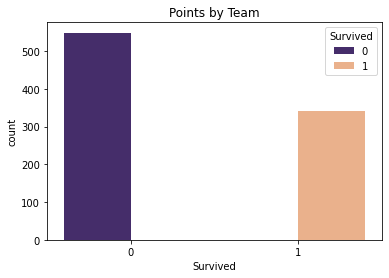

In [ ]:
sns.countplot(x='Survived', hue="Survived",data=df,palette=['#432374',"#FAAE7C"]).set(title='Points by Team')

In [ ]:
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

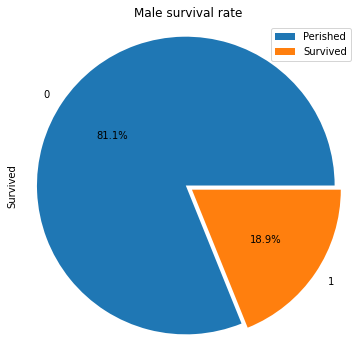

In [ ]:
df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Male survival rate")
plt.show()

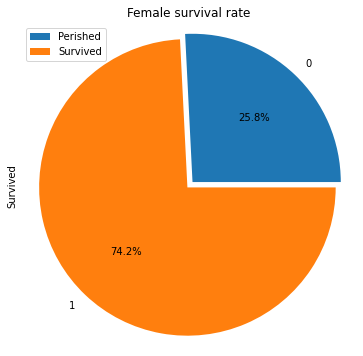

In [ ]:
df[df['Sex'] == 'female'].Survived.groupby(df.Survived).count().plot(kind='pie',autopct='%1.1f%%',figsize=(6, 6),explode=[0,0.05])
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Perished","Survived"])
plt.show()